In [3]:
import pandas as pd
df_cleaned= pd.read_csv(r'C:\Users\Yibabe\Desktop\10academyAIMweek-4\data\cleaned_merge.csv')

C:\Users\Yibabe\AppData\Local\Temp\ipykernel_1516\3559807156.py:2: DtypeWarning: Columns (7,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cleaned= pd.read_csv(r'C:\Users\Yibabe\Desktop\10academyAIMweek-4\data\cleaned_merge.csv')


In [4]:
df_cleaned.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Year,CompetitionOpenTime,BeforeHoliday,AfterHoliday,HolidayPeriod
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0,22.0,2012.0,NoPromo,7,2015,82.0,0,0,AfterHoliday
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,1,13.0,2010.0,"Jan,Apr,Jul,Oct",7,2015,92.0,0,0,NormalDay
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,1,14.0,2011.0,"Jan,Apr,Jul,Oct",7,2015,103.0,0,0,NormalDay
3,6,5,2015-07-31,5651,589,1,1,0,1,a,...,0,22.0,2012.0,NoPromo,7,2015,19.0,0,0,NormalDay
4,8,5,2015-07-31,8492,833,1,1,0,1,a,...,0,22.0,2012.0,NoPromo,7,2015,9.0,0,0,NormalDay


In [ ]:
●to Check & compare sales behavior before, during, and after holidays
Identify Holiday Periods The column StateHoliday should indicate whether a date is during a public holiday. You might also want to create new columns that indicate whether a date is before or after a holiday.

Before Holiday: Create a column to identify days just before holidays (e.g., the day before a holiday).
During Holiday: Use the StateHoliday column.
After Holiday: Create a column to identify days immediately following holidays.

In [5]:
# Mark days as 'Before Holiday', 'During Holiday', 'After Holiday'
df_cleaned['BeforeHoliday'] = df_cleaned['StateHoliday'].shift(-1).fillna(0)  # Previous day is a holiday
df_cleaned['AfterHoliday'] = df_cleaned['StateHoliday'].shift(1).fillna(0)  # Next day is a holiday


In [ ]:
Group by Holiday Periods You can now group your data by these periods (BeforeHoliday, DuringHoliday, AfterHoliday) and calculate the average sales for each period.

In [6]:
# Create a new column to define the period
df_cleaned['HolidayPeriod'] = 'NormalDay'
df_cleaned.loc[df_cleaned['StateHoliday'] != '0', 'HolidayPeriod'] = 'DuringHoliday'
df_cleaned.loc[df_cleaned['BeforeHoliday'] != '0', 'HolidayPeriod'] = 'BeforeHoliday'
df_cleaned.loc[df_cleaned['AfterHoliday'] != '0', 'HolidayPeriod'] = 'AfterHoliday'


In [7]:
sales_by_period = df_cleaned.groupby('HolidayPeriod')['Sales'].mean()
print(sales_by_period)


HolidayPeriod
AfterHoliday     4981.517615
BeforeHoliday    3870.075938
DuringHoliday     155.109535
NormalDay        5598.966845
Name: Sales, dtype: float64


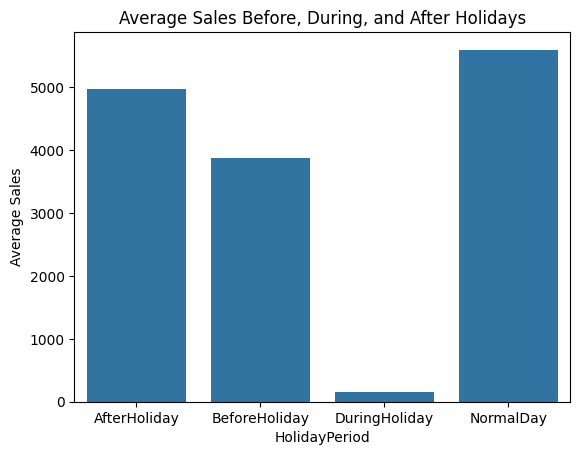

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=sales_by_period.index, y=sales_by_period.values)
plt.title('Average Sales Before, During, and After Holidays')
plt.ylabel('Average Sales')
plt.show()
